<a href="https://colab.research.google.com/github/Redwoods/Py/blob/master/py-basic/pandas-iot/iot_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas: Loading the remote csv file

> [Pandas: Tutorial-reas_csv()](https://www.marsja.se/pandas-read-csv-tutorial-to-csv/amp/)

In [0]:
import pandas as pd

In [0]:
url="http://chaos.inje.ac.kr:3030/data/ppg5k.csv"  # CORS powered express server!
c=pd.read_csv(url, index_col='Time')

In [0]:
c.shape

(5000, 1)

In [0]:
c.head()

,PPG
Time,
2015-07-24 12:43:00.7,444
2015-07-24 12:43:00.8,425
2015-07-24 12:43:00.8,423
2015-07-24 12:43:00.9,415
2015-07-24 12:43:00.9,406


In [0]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2015-07-24 12:43:00.7 to 2015-07-24 12:47:12.3
Data columns (total 1 columns):
PPG    5000 non-null int64
dtypes: int64(1)
memory usage: 78.1+ KB


In [0]:
# another method to read csv 
c2=pd.read_csv(url, index_col=0)
c2.head()

,PPG
Time,
2015-07-24 12:43:00.7,444
2015-07-24 12:43:00.8,425
2015-07-24 12:43:00.8,423
2015-07-24 12:43:00.9,415
2015-07-24 12:43:00.9,406


In [0]:
# import matplotlib.pyplot as plt
%matplotlib inline

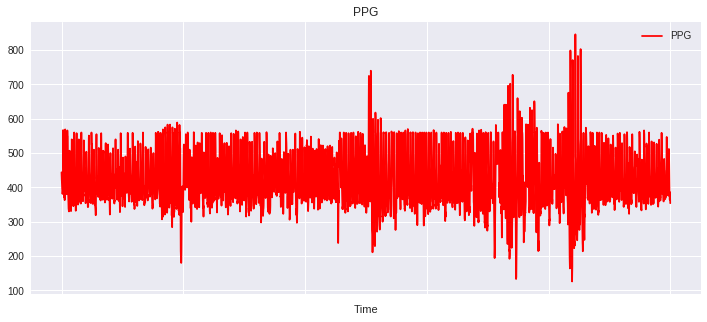

In [0]:
c.plot(figsize=(12,5), color='r', title="PPG")

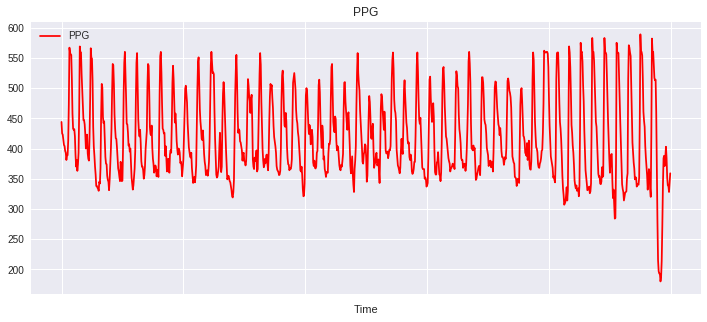

In [0]:
c[:1000].plot(figsize=(12,5), color='r', title="PPG")

### iot data
> Sensor data from Arduino with CdS and DHT22

- temperature
- humidity
- luminosity

In [0]:
url="http://chaos.inje.ac.kr:3030/data/iot_chaos.csv"
iot=pd.read_csv(url, index_col='date')

In [0]:
iot.shape

(100000, 3)

In [0]:
iot.head()

,temperature,humidity,luminosity
date,,,
2018-11-26 17:50:18.613,18.9,31.6,45
2018-11-26 17:50:08.353,18.9,31.6,45
2018-11-26 17:49:58.107,18.9,31.6,45
2018-11-26 17:49:47.846,19.0,31.7,45
2018-11-26 17:49:37.601,19.0,31.7,45


In [0]:
iot.tail()

,temperature,humidity,luminosity
date,,,
2018-11-14 21:03:28.131,22.0,34.5,0
2018-11-14 21:03:17.887,22.1,34.6,0
2018-11-14 21:03:07.626,22.1,34.7,0
2018-11-14 21:02:57.382,22.1,34.6,0
2018-11-14 21:02:47.121,22.1,34.6,0


In [0]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2018-11-26 17:50:18.613 to 2018-11-14 21:02:47.121
Data columns (total 3 columns):
temperature    100000 non-null float64
humidity       100000 non-null float64
luminosity     100000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.1+ MB


### Sort index by date

In [0]:
iot_s = iot.sort_index()

In [0]:
iot_s.head()

,temperature,humidity,luminosity
date,,,
2018-11-14 21:02:47.121,22.1,34.6,0
2018-11-14 21:02:57.382,22.1,34.6,0
2018-11-14 21:03:07.626,22.1,34.7,0
2018-11-14 21:03:17.887,22.1,34.6,0
2018-11-14 21:03:28.131,22.0,34.5,0


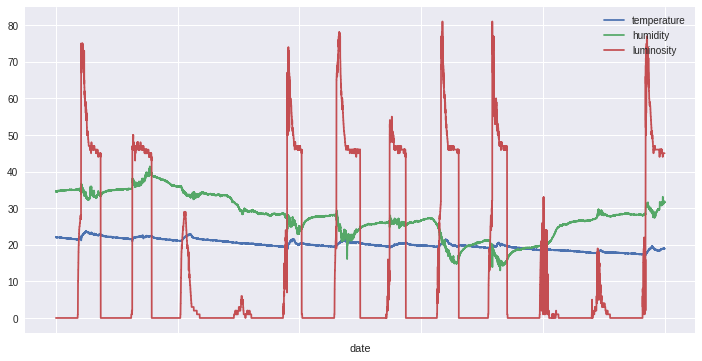

In [0]:
iot_s.plot(figsize=(12,6))

In [0]:
iot_s.mean()

temperature    20.103505
humidity       27.812438
luminosity     13.341040
dtype: float64

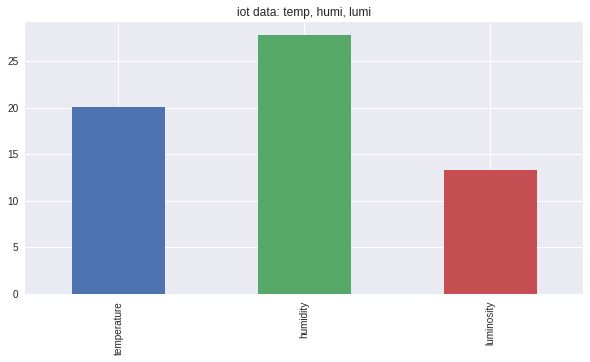

In [0]:
iot_s.mean().plot.bar(figsize=(10,5), title="iot data: temp, humi, lumi")

## Plot the change of sensor data over various time spans.

- resample the data at different frequency
- time span: 60 sec, 1 hour, 1 day, 1 week

In [0]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2018-11-14 21:02:47.121 to 2018-11-26 17:50:18.613
Data columns (total 3 columns):
temperature    100000 non-null float64
humidity       100000 non-null float64
luminosity     100000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.1+ MB


In [0]:
# type of index
iot_s.index[0], type(iot_s.index[0])

('2018-11-14 21:02:47.121', str)

In [0]:
# Convert index to timestamp
iot_s.index = pd.to_datetime(iot_s.index)

In [0]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2018-11-14 21:02:47.121000 to 2018-11-26 17:50:18.613000
Data columns (total 3 columns):
temperature    100000 non-null float64
humidity       100000 non-null float64
luminosity     100000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.1 MB


In [0]:
# Estimate the mean of iot_s for every hour
iot_s.resample('H').mean()  # mean per each hour

,temperature,humidity,luminosity
date,,,
2018-11-14 21:00:00,22.063284,34.610448,0.000000
2018-11-14 22:00:00,21.998291,34.704274,0.000000
2018-11-14 23:00:00,21.918466,34.808807,0.000000
2018-11-15 00:00:00,21.848148,34.873219,0.000000
2018-11-15 01:00:00,21.799715,34.879772,0.000000
2018-11-15 02:00:00,21.726781,34.949288,0.000000
2018-11-15 03:00:00,21.694302,34.999430,0.000000
2018-11-15 04:00:00,21.621937,34.996581,0.000000
2018-11-15 05:00:00,21.590625,34.998580,0.000000


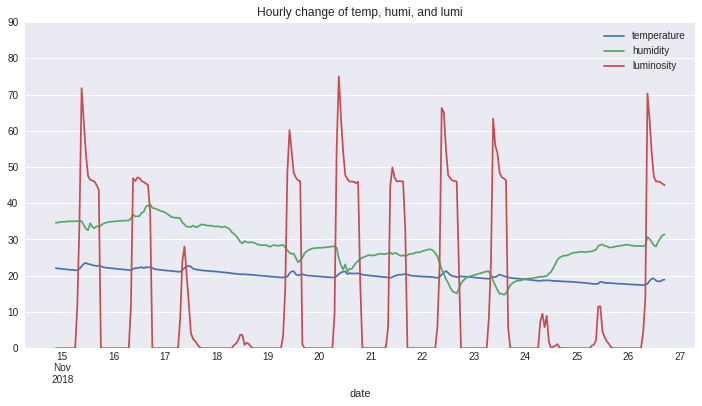

In [0]:
#  Plot mean of the iot data per every hour 
iot_s.resample('H').mean().plot(figsize=(12,6), title='Hourly change of temp, humi, and lumi', 
                                ylim=[0,90])

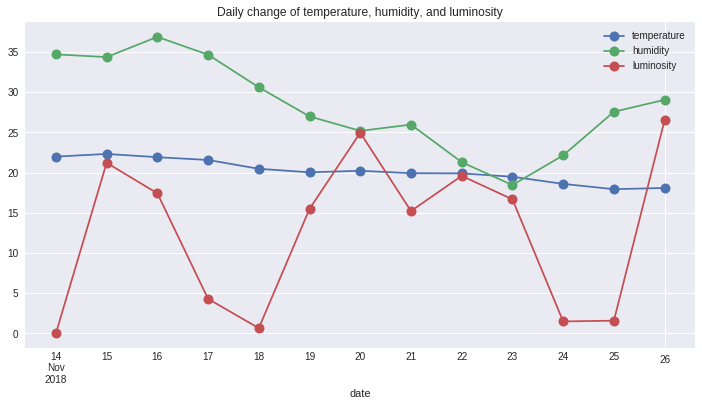

In [0]:
#  Plot mean of the iot data per every day
iot_s.resample('D').mean().plot(kind='line', marker='o', ms=10, figsize=(12,6), title='Daily change of temperature, humidity, and luminosity')



---

